In [1]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/runmin/Documents/Qishi/QishiQR')

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts


import warnings
warnings.filterwarnings(action='ignore')


from config import BuConfig

def Generate_Direction(mj, price='LastPrice', threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj[price].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

----

# 1. Price-change 

In [2]:

# ====== Initial Configuration - Bu 5min ========
params = BuConfig(frequency=5, price='MidPrice')

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset, price='MidPrice')

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5, price='MidPrice')
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

bu1606 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160729.0
bu1706 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


In [3]:
# ====== Initial Configuration - Bu 15min ========
params = BuConfig(frequency=10, price='MidPrice')

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset, price=params.price)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10, price=params.price)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

bu1606 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160729.0
bu1706 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


In [4]:
# ====== Initial Configuration - Bu 15min ========
params = BuConfig(frequency=15, price='MidPrice')

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset, price=params.price)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15, price=params.price)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

bu1606 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160729.0
bu1706 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


## 1.1 Compare the probability of price change

Text(0.5,0,'Price threshold')

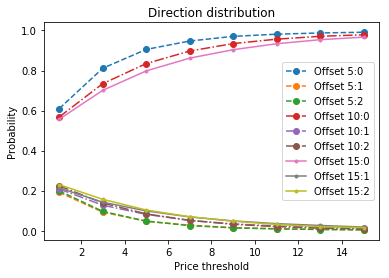

In [5]:
fig = plt.figure()
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['Offset 5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['Offset 10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['Offset 15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [6]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.33333333 0.33333333 0.33333333]

Prior length:3 	0,1,2: [0.40740741 0.33333333 0.25925926]

Prior length:4 	0,1,2: [0.41975309 0.30864198 0.27160494]

Prior length:5 	0,1,2: [0.37860082 0.36213992 0.25925926]

Prior length:6 	0,1,2: [0.34567901 0.34430727 0.31001372]

Prior length:7 	0,1,2: [0.4430727  0.30544124 0.25148605]

Prior length:8 	0,1,2: [0.58283798 0.23807346 0.17908855]


In [7]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.33333333 0.33333333 0.33333333]

Prior length:3 	0,1,2: [0.44444444 0.40740741 0.14814815]

Prior length:4 	0,1,2: [0.48148148 0.34567901 0.17283951]

Prior length:5 	0,1,2: [0.41152263 0.40329218 0.18518519]

Prior length:6 	0,1,2: [0.37585734 0.31687243 0.30727023]

Prior length:7 	0,1,2: [0.48331047 0.28440786 0.23228166]

Prior length:8 	0,1,2: [0.67779302 0.17634507 0.14586191]


In [8]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.33333333 0.33333333 0.33333333]

Prior length:3 	0,1,2: [0.48148148 0.40740741 0.11111111]

Prior length:4 	0,1,2: [0.45679012 0.41975309 0.12345679]

Prior length:5 	0,1,2: [0.39917695 0.39917695 0.20164609]

Prior length:6 	0,1,2: [0.36213992 0.35665295 0.28120713]

Prior length:7 	0,1,2: [0.52903521 0.25925926 0.21170553]

Prior length:8 	0,1,2: [0.73144338 0.14327084 0.12528578]


# 3. Check the generated signal

In [9]:
params = BuConfig(frequency=5, price='MidPrice')

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5,  price=params.price)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [0.58764426 0.26938221 0.14297352]
Prior length:3 	0,1,2: [0.62525458 0.21262729 0.16211813]
Prior length:4 	0,1,2: [0.6539036  0.18995248 0.15614392]
Prior length:5 	0,1,2: [0.67033265 0.1778683  0.15179905]
Prior length:6 	0,1,2: [0.68608282 0.166463   0.14745418]
Prior length:7 	0,1,2: [0.72165648 0.15763747 0.12070604]


In [10]:
params = BuConfig(frequency=10, price='MidPrice')

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10, price=params.price)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [0.5511135  0.23504159 0.21384492]
Prior length:3 	0,1,2: [0.53662463 0.25623826 0.20713711]
Prior length:4 	0,1,2: [0.5685538  0.25087202 0.18057419]
Prior length:5 	0,1,2: [0.5859941  0.21974779 0.19425812]
Prior length:6 	0,1,2: [0.62543601 0.18781862 0.18674537]
Prior length:7 	0,1,2: [0.70458814 0.1524014  0.14301046]


In [11]:
params = BuConfig(frequency=15, price='MidPrice')

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15, price=params.price)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [0.53349001 0.31179005 0.15471994]
Prior length:3 	0,1,2: [0.53349001 0.29494712 0.17156287]
Prior length:4 	0,1,2: [0.53113984 0.28084606 0.1880141 ]
Prior length:5 	0,1,2: [0.56678418 0.25381904 0.17939679]
Prior length:6 	0,1,2: [0.62279671 0.19545633 0.18174696]
Prior length:7 	0,1,2: [0.69839405 0.16529573 0.13631022]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.205655,0.002583,-0.002691,0.001556,0.000120,-0.017251,0.013171,-0.075828,0.578156,3.140461,1271,1.157743,0.660897
1,0.232780,0.000753,-0.003063,0.001675,0.000046,-0.023737,0.010321,-0.080252,0.546973,0.808360,959,1.039208,0.654849
2,0.183785,0.001409,-0.002794,0.001638,0.000077,-0.022717,0.011488,-0.067208,0.586199,1.916544,1081,1.080234,0.646623
3,0.201750,0.002196,-0.002597,0.001959,0.000120,-0.016741,0.013629,-0.069826,0.754272,2.721090,1079,1.131578,0.573679
4,0.215675,0.000906,-0.002683,0.002199,0.000047,-0.015793,0.013185,-0.115979,0.819338,1.050462,1127,1.048667,0.501331
5,0.248567,0.000242,-0.002544,0.002308,0.000013,-0.016203,0.014977,-0.145367,0.907004,0.243701,1128,1.008384,0.470745
6,0.186173,0.000881,-0.002594,0.002382,0.000050,-0.021470,0.014192,-0.064588,0.917942,1.183249,1030,1.047118,0.472816


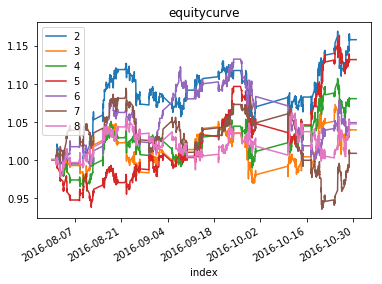

In [12]:
from config import BuConfig
params=BuConfig(frequency=5, price='MidPrice')

Bu_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5, price=params.price )
Bu_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Bu_5_test.run()
Bu_5_test.plot()
Bu_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.235992,0.001654,-0.003831,0.001969,0.000134,-0.028817,0.013185,-0.087587,0.514022,1.751828,729,1.096098,0.681756
1,0.235992,0.001654,-0.003831,0.001969,0.000134,-0.028817,0.013185,-0.087587,0.514022,1.751828,729,1.096098,0.681756
2,0.201100,0.002685,-0.003129,0.002140,0.000173,-0.030919,0.013185,-0.066809,0.683824,3.338440,915,1.164901,0.571585
3,0.213076,0.000868,-0.003380,0.002299,0.000065,-0.028817,0.016043,-0.102147,0.680051,1.017890,789,1.046425,0.550063
4,0.204269,0.002670,-0.002931,0.002838,0.000205,-0.022335,0.018381,-0.079434,0.968421,3.267727,770,1.163845,0.503896
5,0.233647,0.002958,-0.002898,0.002981,0.000239,-0.022212,0.018381,-0.068930,1.028802,3.164734,730,1.183772,0.486301
6,0.252771,0.003265,-0.003461,0.003328,0.000339,-0.025520,0.022190,-0.060933,0.961721,3.229619,569,1.205455,0.520211


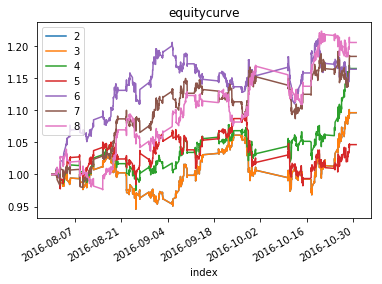

In [13]:
params=BuConfig(frequency=10, price='MidPrice')

Bu_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10, price=params.price )
Bu_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Bu_10_test.run()
Bu_10_test.plot()
Bu_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.212481,0.001177,-0.004192,0.002272,0.000134,-0.028973,0.012658,-0.067027,0.542087,1.384428,519,1.065850,0.666667
1,0.231411,0.002589,-0.004764,0.002754,0.000387,-0.034236,0.014739,-0.060871,0.578003,2.796884,395,1.158467,0.683544
2,0.246786,0.001047,-0.004708,0.002830,0.000132,-0.034246,0.014790,-0.103396,0.601128,1.061004,468,1.057753,0.615385
3,0.224758,-0.001730,-0.003744,0.002973,-0.000166,-0.022385,0.022767,-0.161186,0.794109,-1.924545,615,0.897867,0.460163
4,0.182827,-0.001463,-0.004041,0.002980,-0.000156,-0.030952,0.012665,-0.123119,0.737461,-2.000334,554,0.912142,0.483755
5,0.234125,-0.000909,-0.003564,0.003483,-0.000106,-0.018932,0.021899,-0.122850,0.977265,-0.970598,506,0.942445,0.438735
6,0.188348,-0.001104,-0.004046,0.004212,-0.000168,-0.022235,0.024195,-0.126723,1.040839,-1.465408,388,0.931660,0.435567


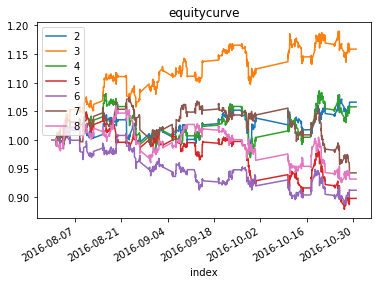

In [14]:
params=BuConfig(frequency=15, price='MidPrice')

Bu_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15, price=params.price )
Bu_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Bu_15_test.run()
Bu_15_test.plot()
Bu_15_test.performance